In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:07<00:00, 288MB/s]
100% 1.06G/1.06G [00:07<00:00, 149MB/s]


In [4]:
import zipfile
zip_data = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_data.extractall('/content')
zip_data.close()

# Import Basic package to build CNN Model

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
# Genrate dataset
train_ds = keras.utils.image_dataset_from_directory(directory = '/content/train', labels='inferred', label_mode='int',
                                                   batch_size=32, image_size=(256, 256))

validation_ds = keras.utils.image_dataset_from_directory(directory = '/content/test', labels='inferred', label_mode='int',
                                                   batch_size=32, image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:

# Normalization

def process(image, label):
  image = tf.cast(image/255.,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


# CNN Model Building

In [11]:
model = Sequential()

# CNN PART
model.add(Conv2D(32, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# DNN PART

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, batch_size=128, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 110ms/step - loss: 2.0091 - accuracy: 0.5595 - val_loss: 0.6673 - val_accuracy: 0.5914
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6213 - accuracy: 0.6617 - val_loss: 0.5376 - val_accuracy: 0.7360
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5500 - accuracy: 0.7219 - val_loss: 0.5788 - val_accuracy: 0.6840
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4991 - accuracy: 0.7657 - val_loss: 0.5154 - val_accuracy: 0.7518
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4662 - accuracy: 0.7857 - val_loss: 0.4734 - val_accuracy: 0.7722
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3989 - accuracy: 0.8260 - val_loss: 0.5657 - val_accuracy: 0.7546
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3566 - accuracy: 0.8470 - val_loss: 0.6685 - val_ac

In [15]:
# Test
import cv2

In [16]:
test_img = cv2.imread('/content/CAT.jpeg')

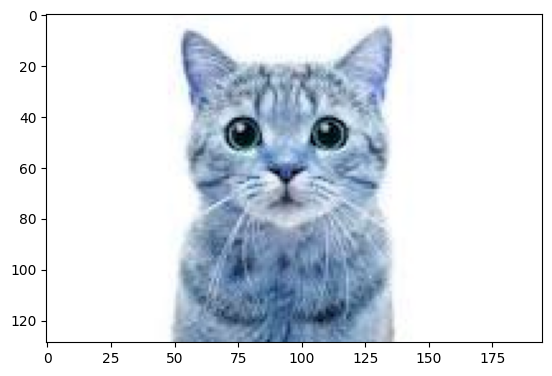

In [17]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [18]:
test_img.shape

(129, 195, 3)

In [19]:
test_img = cv2.resize(test_img, (256,256))

In [20]:
test_input = test_img.reshape((1,256,256,3))

In [21]:
model.predict(test_input)

1/1 [==============================] - 0s 352ms/step


array([[0.]], dtype=float32)

In [ ]:
# CIFAR 10
# Fashion MNIST
# MRI BRAIN TUMOR